# TOV Equations

The equations of structure of an static compact object with spherical symmetry are given by (in units where $c=G=1$):

$$ P=P(\rho), $$
$$ \frac{dm}{dr}=4\pi \rho r^2 , $$
$$ \frac{dP}{dr}=-(\rho+P)\frac{m+4\pi r^3 P}{r(r-2m)} , $$

And if it's required


$$ \frac{d\nu}{dr}= \frac{m+4\pi r^3 P}{r(r-2m)} = -\frac{1}{\rho+P}\frac{dP}{dr}.$$

## Non-dimensionalization

$$ \rho=\rho_* \bar{\rho} \quad ; \quad P=P_* \bar{P} \quad ; \quad m=m_*\bar{m} \quad ; \quad r=r_*\bar{r}. $$

Replacing in the system of equations one obtains:
$$ \frac{d\bar{m}}{\bar{dr}}=\left( \frac{\rho_* r_*^3}{m_*} \right) 4\pi \bar{\rho} \bar{r}^2 , $$
$$ \frac{d\bar{P}}{d\bar{r}}=-\left( \frac{m_*}{r_* \rho_*} \right)\left(\frac{\rho_*}{P_*}\bar{\rho}+\bar{P}\right)\frac{\bar{m}+\left( \frac{r_*^3 P_*}{m_*} \right)4\pi \bar{r}^3 \bar{P}}{\bar{r}\left(\bar{r}-\frac{m_*}{r_*}2\bar{m}\right)}, $$
$$ \frac{d\nu}{d\bar{r}}=-\frac{1}{\left(\bar{P}+\frac{\rho_*}{P_*}\bar{\rho}\right)}\frac{d\bar{P}}{d\bar{r}}. $$

In order to keep the form of system of equations the same, it is required that:
$$\frac{\rho_* r_*^3}{m_*}=1,\quad \frac{m_*}{r_* \rho_*}=1, \quad \frac{\rho_*}{P_*}=1, \quad \frac{r_*^3 P_*}{m_*}=1,\quad \frac{m_*}{r_*}=1. $$

or
$$P_*=\rho_*,\quad m_*=r_*,\quad r_*=\frac{1}{\sqrt{\rho_*}}. $$

Using the neutron mass $m_n$ as the only parameter one can write $\rho_*= \frac{m_{n}^{4}c^{3}}{8 \pi^2 \hbar^3} $ and putting back the factors of $G$ and $c$ we have everything in terms of $m_{n}$:
$$ \rho_*=\frac{m_{n}^{4}c^{3}}{8 \pi^2 \hbar^3},\quad P_*= \rho_* c^2 ,\quad  r_*=\frac{c}{\sqrt{\rho_* G}}\quad, \quad m_*= \frac{r_* c^2}{G}.$$

Finally, the nondimensional TOV equations will be 
$$ \bar{P}=\bar{P}(\bar{\rho}), $$
$$ \frac{d\bar{m}}{\bar{dr}}=4\pi \bar{\rho} \bar{r}^2 , $$
$$ \frac{d\bar{P}}{d\bar{r}}=-(\bar{\rho}+\bar{P})\frac{\bar{m}+4\pi \bar{r}^3 \bar{P}}{\bar{r}(\bar{r}-2\bar{m})}, $$
$$ \frac{d\nu}{d\bar{r}}=-\frac{1}{\bar{\rho}+\bar{P}}\frac{d\bar{P}}{d\bar{r}}. $$

# Solving the system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate

Loading some constants (in cgs units) from a separeted file and defining the variables that carry the dimensions

In [2]:
import Physical_Const as phys
h=phys.h 
c=phys.c
G=phys.G
Msun=phys.Msun
mn=phys.mn # Neutron mass


rhodim=mn**4.0*c**3.0/(8.0*np.pi**2*(h/(2.0*np.pi))**3.0) #Dimensions of energy density
rdim=c/np.sqrt(rhodim*G) # Dimensions of radius
mdim=rdim*c**2.0/G # Dimensions of mass
Pdim=rhodim*c**2 # Dimensions of pressure

## EOS

We want our equation of state to be a table of numbers $(\rho_{i},P_{i})$, this equation of state will depend on the theoretical model used to model the interior of the neutron star.

Loading some of the equations of state contained in the EOS folder (taken from http://xtreme.as.arizona.edu/NeutronStars/, a website maintained by an astrophysics group in Arizona) and interpolating $\log{P}(\log{\rho})$ and $\log{\rho}(\log{P})$ linearly (as it is usually done, cf. Baym, Pethick, Sutherland 1971)

In [3]:
# loadtxt from numpy aids the process of reading and saving into numpy arrays
rhoNL3,PNL3=np.loadtxt('EOS/EOSFull_NL3_BPS02.dat',usecols=(0,1),unpack=True) #Only EOS not included in the website
def P_NL3(rho):
    logP=interpolate.interp1d(np.log10(rhoNL3/rhodim),np.log10(PNL3/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_NL3(P):
    logrho=interpolate.interp1d(np.log10(PNL3/Pdim),np.log10(rhoNL3/rhodim))
    return 10.0**logrho(np.log10(P))

rhoSLy,PSLy=np.loadtxt('EOS/sly.dat',usecols=(2,1),unpack=True)
def P_SLy(rho):
    logP=interpolate.interp1d(np.log10(rhoSLy/rhodim),np.log10((PSLy*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_SLy(P):
    logrho=interpolate.interp1d(np.log10((PSLy*c**2)/Pdim),np.log10(rhoSLy/rhodim))
    return 10.0**logrho(np.log10(P))

rhoBSK19,PBSK19=np.loadtxt('EOS/bsk19.dat',usecols=(1,2),unpack=True) #This family of EOS (BSK##) has the column order inverted
def P_BSK19(rho):
    logP=interpolate.interp1d(np.log10(rhoBSK19/rhodim),np.log10((PBSK19*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_BSK19(P):
    logrho=interpolate.interp1d(np.log10((PBSK19*c**2)/Pdim),np.log10(rhoBSK19/rhodim))
    return 10.0**logrho(np.log10(P))

rhoBSK20,PBSK20=np.loadtxt('EOS/bsk20.dat',usecols=(1,2),unpack=True)
def P_BSK20(rho):
    logP=interpolate.interp1d(np.log10(rhoBSK20/rhodim),np.log10((PBSK20*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_BSK20(P):
    logrho=interpolate.interp1d(np.log10((PBSK20*c**2)/Pdim),np.log10(rhoBSK20/rhodim))
    return 10.0**logrho(np.log10(P))

rhoALF1,PALF1=np.loadtxt('EOS/alf1.dat',usecols=(2,1),unpack=True)
def P_ALF1(rho):
    logP=interpolate.interp1d(np.log10(rhoALF1/rhodim),np.log10((PALF1*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_ALF1(P):
    logrho=interpolate.interp1d(np.log10((PALF1*c**2)/Pdim),np.log10((rhoALF1/rhodim)))
    return 10.0**logrho(np.log10(P))

rhoH1,PH1=np.loadtxt('EOS/H1.dat',usecols=(2,1),unpack=True)
def P_H1(rho):
    logP=interpolate.interp1d(np.log10(rhoH1/rhodim),np.log10((PH1*c**2)/Pdim))
    return 10.0**logP(np.log10(rho))
def rho_H1(P):
    logrho=interpolate.interp1d(np.log10((PH1*c**2)/Pdim),np.log10(rhoH1/rhodim))
    return 10.0**logrho(np.log10(P))                            

#-------------------------(Don't know how the data is organized yet)
#rhoSQM1,PSQM1=np.loadtxt('EOS/sqm1.dat',usecols=(2,1),unpack=True)
#def P_SQM1(rho):
#    logP=interpolate.interp1d(np.log10(rhoSQM1/rhodim),np.log10((PSQM1*c**2)/Pdim))
#    return 10.0**logP(np.log10(rho))
#def rho_SQM1(P):
#    logrho=interpolate.interp1d(np.log10((PSQM1*c**2)/Pdim),np.log10(rhoSQM1/rhodim))
#    return 10.0**logrho(np.log10(P))

#rhoSQM2,PSQM2=np.loadtxt('EOS/sqm2.dat',usecols=(2,1),unpack=True)
#def P_SQM2(rho):
#    logP=interpolate.interp1d(np.log10(rhoSQM2/rhodim),np.log10((PSQM2*c**2)/Pdim))
#    return 10.0**logP(np.log10(rho))
#def rho_SQM2(P):
#    logrho=interpolate.interp1d(np.log10((PSQM2*c**2)/Pdim),np.log10(rhoSQM2/rhodim))
#    return 10.0**logrho(np.log10(P))

Plotting them with logarithmic scale on both axis

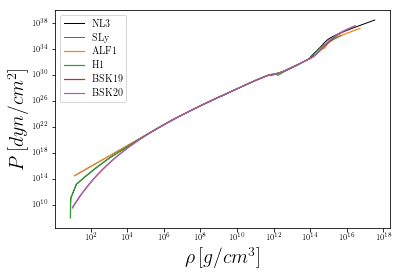

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.loglog(rhoNL3,P_NL3(rhoNL3/rhodim)*Pdim,'k-', linewidth=1,label="NL3") # Interpolation
#plt.loglog(rhoNL3,PNL3,'o', markersize=0.8) # Data

plt.loglog(rhoSLy,P_SLy(rhoSLy/rhodim)*Pdim,'-', linewidth=1,label="SLy") 
#plt.loglog(rhoSLy,PSLy*c**2,'o', markersize=0.5) 

plt.loglog(rhoALF1,P_ALF1(rhoALF1/rhodim)*Pdim,'-', linewidth=1.2,label="ALF1") 
#plt.loglog(rhoALF1,PALF1*c**2,'o', markersize=.5) 

plt.loglog(rhoH1,P_H1(rhoH1/rhodim)*Pdim,'-', linewidth=1.2,label="H1") 
#plt.loglog(rhoH1,PH1*c**2,'o', markersize=.5) 


plt.loglog(rhoBSK19,P_BSK19(rhoBSK19/rhodim)*Pdim,'-', linewidth=1.2,label="BSK19") 
#plt.loglog(rhoBSK19,PBSK19*c**2,'o', markersize=.5) 

plt.loglog(rhoBSK20,P_BSK20(rhoBSK20/rhodim)*Pdim,'-', linewidth=1.2,label="BSK20") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', markersize=.5) 

#-------------Strange Quark Matter 
    
#plt.loglog(rhoSQM1,P_SQM1(rhoSQM1/rhodim)*pdim,'-', linewidth=1.2,label="SQM1") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', markersize=.5) 
    
#plt.loglog(rhoSQM2,P_SQM2(rhoSQM2/rhodim)*pdim,'-', linewidth=1.2,label="SQM2") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', markersize=.5)  
    
plt.xlabel(r'$\rho\,[g/cm^3]$')
plt.ylabel(r'$P\,[dyn/cm^{2}]$')
plt.legend()
plt.savefig('figures/EOS.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()

## Seting up the ODE solver

In standard notation the system of ODEs can be written
$$ \frac{dy^{i}}{dr} = f^{i}(r,y^i). $$
Where $y=(m,P,\nu)$ and $f$ is the right hand side of the system.

Using the RK4 method an integration step $dr$ will be done by

In [5]:
def RK4Step(f, r, y, dr):
    """Propagates the solver one step further. Takes as inputs the RHS of the system f, the current location r,
    the current value of the variables y, and the stepsize. Returns the value of the variables in location r+dr."""
    k1,l1,n1 = f(r,y)
    
    k2,l2,n2 = f(r+0.5*dr,[y[0]+0.5*dr*k1,y[1]+0.5*dr*l1,y[2]+0.5*dr*n1])   
    
    k3,l3,n3 = f(r+0.5*dr,[y[0]+0.5*dr*k2,y[1]+0.5*dr*l2,y[2]+0.5*dr*n2])
    
    k4,l4,n4 = f(r+dr,[y[0]+dr*k3,y[1]+dr*l3,y[2]+dr*n3])
    
    k=(dr/6)*(k1+2.0*k2+2.0*k3+k4)
    l=(dr/6)*(l1+2.0*l2+2.0*l3+l4)
    n=(dr/6)*(n1+2.0*n2+2.0*n3+n4)
    
    return [y[0]+k,y[1]+l,y[2]+n]

With the value of $dr$ (taken from Baym, Pethick, Sutherland 1971)

$$  \Delta{r} = \delta \left( \frac { 1 } { m } \frac { \mathop{dm} } { \mathop{dr}  } - \frac { 1 } { P } \frac { \mathop{dP}  } { \mathop{dr} } \right) ^ { - 1 }, $$
where $\delta$ will control the number of steps per pressure-mass decade. Note that the initial step has to be taken arbitrarily.

In [6]:
delta=0.1
def stepsize(y,dy):
    """Adaptive stepsize. It takes the current value of the variables and it's gradients. The parameter delta is defined externally."""
    return delta*((1/y[0])*dy[0]-(1/y[1])*dy[1])**(-1)

To solve the TOV equations we need two initial conditions:

$$ \bar{P}{(0)}=P_{c}{(\bar{\rho_{c}})} \quad ; \quad \bar{m}{(0)}=0,$$

depending on the choice of $\rho_{c}$.

The routine will take a list of initial values $y0=(m_0,P_0,\nu_0)$, the initial radius $r_0$ and stepsize $dr_0$, and the EOS as input. And it will return an array with $m(r)$, $P(r)$, $\rho(r)$, $\nu(r)$ and $r$ in nondimensional units.

In [7]:
def static(y0,r0,dr0,rhoEoS):
    """Builds a neutron star model from the initial values y0 and an interpolated EOS. The solver will start
    in r0 with an arbitrary stepsize dr0 and will stop when the energy density is less than 20 g/cm^3 or the
    pressure becomes negative. Returns the mass, pressure, density and nu profiles as functions of r."""
    def TOV(r,y):
        mns, pns, nuns= y
        dmdr=4.0*np.pi*r**2.0*rhoEoS(pns) 
        dpdr=-((4.0*np.pi*r**3.0*pns+mns)*(pns+rhoEoS(pns)))/(r*(r-2.0*mns))
        dnudr=-dpdr/(pns+rhoEoS(pns))
        return [dmdr,dpdr,dnudr]
    
    ms=[]; ps=[]; rhos=[]; nus=[]; rs=[]  # creating lists to save the solution  
    ms.append(y0[0]); ps.append(y0[1]); rhos.append(rhoEoS(y0[1])); nus.append(y0[2]); rs.append(r0) 
    y=RK4Step(TOV,r0,y0,dr0) # first step taken arbitrary (dr0)  
    r=r0+dr0 
    ms.append(y[0]); ps.append(y[1]); rhos.append(rhoEoS(y[1])); nus.append(y[2]); rs.append(r) 
    while rhoEoS(y[1])*rhodim > 2e+1 and y[1] > 0.0: # Taking 20 g/cm^3 as the limiting density if the pressure hasn't changed sign
        dr=stepsize(y,TOV(r,y))
        y=RK4Step(TOV,r,y,dr)
        r=r+dr
        ms.append(y[0]); ps.append(y[1]); rhos.append(rhoEoS(y[1])); nus.append(y[2]); rs.append(r) 
    return np.array([ms,ps,rhos,nus,rs])

# Constructing models

Choosing initial values and parameters

In [23]:
r0=1e-4
dr0=r0/10000
rho0=10.0**15.61
m0=0
nu0=0

and picking one of the EOS

In [24]:
m,p,rho,nu,r = static([m0,P_NL3(rho0/rhodim),nu0],r0,dr0,rho_NL3)

In [25]:
r[-1]

0.48295149558214645

### Interpolating and finding derivatives

Using a spline with a smooth factor that fixes the number of knots for the fitting. The function UnivariateSpline (https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.interpolate.UnivariateSpline.html#scipy.interpolate.UnivariateSpline) allows one to find derivatives of the interpolation

In [30]:
k=5 #spline order kmax=5
s=1e-6 #smooth factor
rhos=interpolate.UnivariateSpline(r, rho, k=k, s=s)
drho=interpolate.UnivariateSpline(r, rho, k=k, s=s).derivative(n=1)
ddrho=interpolate.UnivariateSpline(r, rho, k=k, s=s).derivative(n=2)

ps=interpolate.UnivariateSpline(r, p, k=k, s=s)
dp=interpolate.UnivariateSpline(r, p, k=k, s=s).derivative(n=1)
ddp=interpolate.UnivariateSpline(r, p, k=k, s=s).derivative(n=2)

Plotting using the initial values to scale the solution

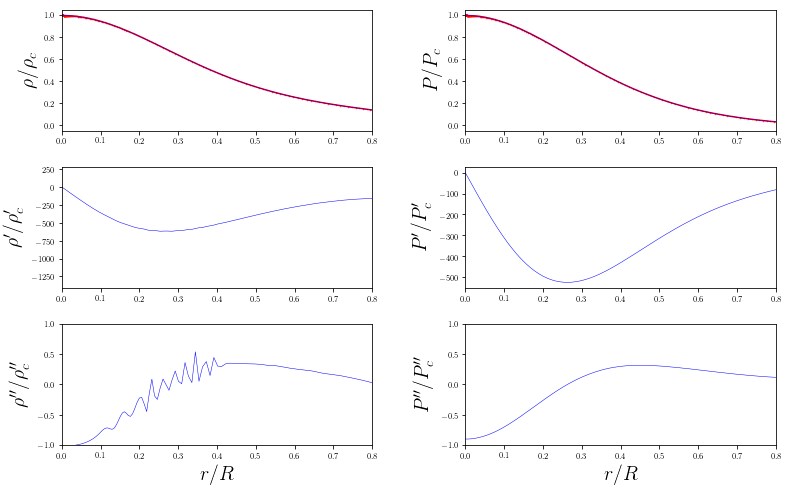

<Figure size 432x288 with 0 Axes>

In [31]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure(figsize=[12.8,8])

plt.subplot(321)
plt.plot(r/(r[-1]),rho/abs(rho[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r/(r[-1]),rhos(r)/abs(rho[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$\rho/\rho_c$')
plt.xlim(0,0.8) # leaving the crust out 

plt.subplot(322)
plt.plot(r/(r[-1]),p/abs(p[0]),color='red',marker='o',markersize='0.4') 
plt.plot(r/(r[-1]),ps(r)/abs(p[0]),color='blue',linewidth='0.5') 
plt.ylabel(r'$P/P_c$')
plt.xlim(0,0.8)

plt.subplot(323)
plt.plot(r/(r[-1]),drho(r)/abs(drho(r)[0]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime}/\rho^{\prime}_{c} $')
plt.xlim(0,0.8)

plt.subplot(324)
plt.plot(r/(r[-1]),dp(r)/abs(drho(r)[0]),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime}/P^{\prime}_{c} $')
plt.xlim(0,0.8)

plt.subplot(325)
plt.plot(r/(r[-1]),ddrho(r)/abs(ddrho(r)[0]),'b-', linewidth=0.5) 
plt.ylabel(r'$\rho^{\prime\prime}/\rho^{\prime\prime}_{c}$')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
plt.ylim(-1,1)

plt.subplot(326)
plt.plot(r/(r[-1]),ddp(r)/abs(ddrho(r)[0]),'b-', linewidth=0.5) 
plt.ylabel(r'$P^{\prime\prime}/P^{\prime\prime}_{c}$ ')
plt.xlabel(r'$r/R$')
plt.xlim(0,0.8)
plt.ylim(-1,1)

fig.subplots_adjust(hspace=0.3,wspace=0.3)

plt.savefig('figures/ddsSLy.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

## $M-\rho_c$ and $M-R$ diagrams

The family of models are obtained choosing a range of central densities $rhosc$

In [13]:
def MRrhoc(m0,r0,dr0,rhosc,rhoEoS,PEoS):
    """Builds a family of neutron star models from an equation of state P(rho) and rho(P), given a range of central densities rhosc.
    Returns three lists with the values of Rstar (RR) and Mstar (MM) for the corresponding value of rhoc (rhorho)."""
    psc=PEoS(rhosc/rhodim) #Range of central pressures
    MM=[];RR=[];rhorho=[]
    for pc in psc:
        m,p,rho,nu,r = static([m0,pc,0],r0,dr0,rhoEoS)
        RR.append(r[-1]*rdim*1e-5); MM.append(m[-1]*mdim/Msun); rhorho.append(rho[0]*rhodim)
    return [RR,MM,rhorho]

In [14]:
#Range of central densities (It has to take into consideration how high the EOS's energy density goes)
n=np.arange(14.4,15.61,0.02)
rhosc=10.0**n 

In [15]:
MRNL3=MRrhoc(m0,r0,dr0,rhosc,rho_NL3,P_NL3)
#MRALF1=MRrho(m_0,r0,dr0,rhosc,rho_ALF1,P_ALF1)
#MRSLy=MRrho(m_0,r0,dr0,rhosc,rho_SLy,P_SLy)
#MRH1=MRrho(m0,r0,dr0,rhosc,rho_H1,P_H1)
#MRBSK19=MRrho(m0,r0,dr0,rhosc,rho_BSK19,P_BSK19)
#MRBSK20=MRrho(m0,r0,dr0,rhosc,rho_BSK20,P_BSK20)

Plotting $M-R$

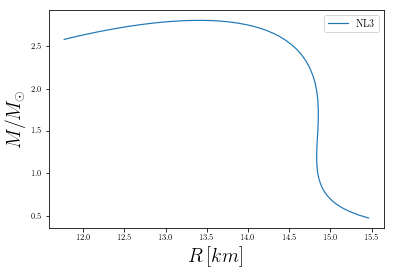

<Figure size 432x288 with 0 Axes>

In [16]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig = plt.figure()

#plt.plot(MRALF1[0], MRALF1[1],'-', linewidth=1.2,label='ALF1')
#plt.plot(MRSLy[0], MRSLy[1],'-', linewidth=1.2,label='SLy')
plt.plot(MRNL3[0], MRNL3[1],'-', linewidth=1.2,label='NL3')
#plt.plot(MRH1[0], MRH1[1],'-', linewidth=1.2,label='H1')
#plt.plot(MRBSK19[0], MRBSK19[1],'-', linewidth=1.2,label='BSK19')
#plt.plot(MRBSK20[0], MRBSK20[1],'-', linewidth=1.2,label='BSK20')

plt.xlabel(r'$R\,[km]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend()
plt.savefig('figures/MRrels.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

Plotting $M-\rho_c$

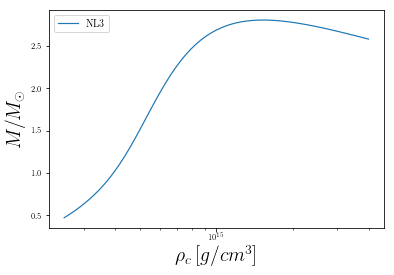

<Figure size 432x288 with 0 Axes>

In [17]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()

plt.plot(MRNL3[2], MRNL3[1], '-', linewidth=1.2,label='NL3')
plt.xscale('log')
plt.xlabel(r'$\rho_c\,[g/cm^{3}]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend()
plt.savefig('figures/Mrhorel_NL3.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()